importing libraries

In [37]:
#importing libraries

# For Data Manipulation and Visualization

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

# for Data Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


loading dataset

In [38]:
# uploading dataset
data=pd.read_csv('/content/suv_data.csv')

In [39]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [41]:
data.shape


(400, 5)

In [42]:
data.size

2000

In [43]:
data= data.drop(["User ID"],axis=1)
data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


check for null values

In [44]:
# Null value count
data.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [45]:
data.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

mping to numerical values

In [46]:
data["Gender"] = data.Gender.map({"Male":1,"Female":0})
data

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [47]:
data.Gender.value_counts()

Gender
0    204
1    196
Name: count, dtype: int64

In [49]:
data.dtypes

Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

data.describe()

In [56]:
# Correlation matrix
data.corr()


,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


<Axes: >

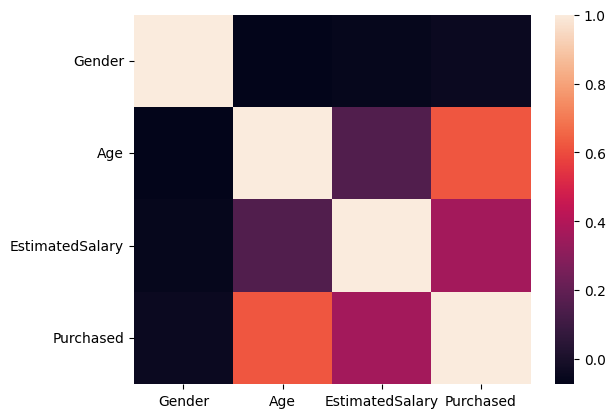

In [54]:
# Let's Visulize correlation matrix with help of heatmap
sns.heatmap(data.corr())

Text(0, 0.5, 'Count')

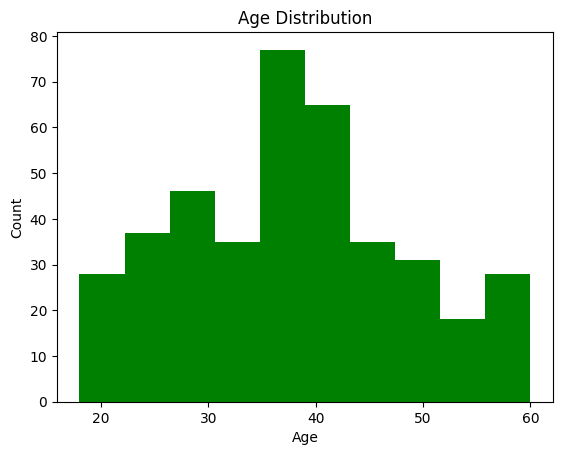

In [60]:
plt.figure
plt.hist(data.Age,color='green')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

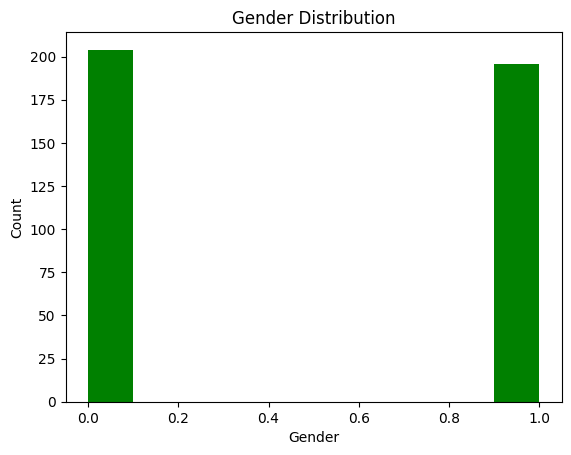

In [62]:
plt.figure
plt.hist(data.Gender,color='green')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

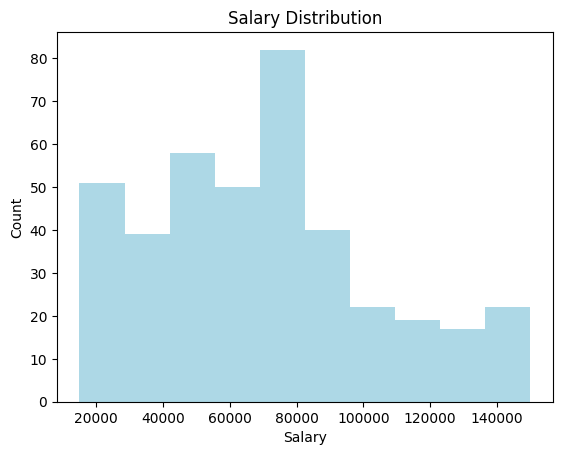

In [63]:
plt.figure
plt.hist(data.EstimatedSalary,color='lightblue')
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Count")

splitting x and y values

In [65]:
x = data.drop(["Purchased"],axis=1)
y = data["Purchased"]

In [66]:
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [67]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

split data in to test and train

In [68]:
## Splitting dataset into trainning and Test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [69]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((300, 3), (100, 3), (300,), (100,))

standardize data using 'StandardScaler' from scikit-learn.

In [71]:
sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train))
x_test = pd.DataFrame(sc.fit_transform(x_test))

In [72]:
x_train

,0,1,2
0,-0.986754,1.892589,1.521894
1,-0.986754,0.125038,0.032132
2,1.013423,0.910616,-1.311575
3,1.013423,-1.347922,-1.486841
4,-0.986754,-0.169554,-0.581299
...,...,...,...
295,-0.986754,-1.347922,-1.253153
296,-0.986754,-1.151527,-1.019465
297,-0.986754,0.517827,1.843215
298,1.013423,0.125038,0.207398


model training_logistic regression

importing algorithm

In [74]:
# Import Algorithims
from sklearn.linear_model import LogisticRegression

In [75]:
LR = LogisticRegression(random_state=42)
LR.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [76]:
yLR = LR.predict(x_test)
yLR

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])